<AxesSubplot: xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

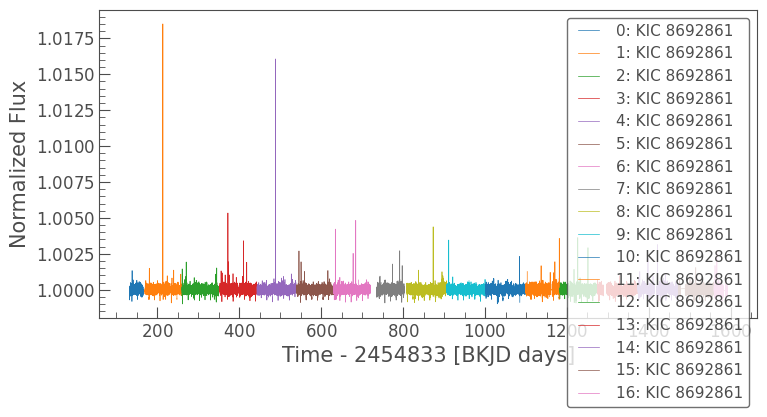

In [1]:
import lightkurve as lk
%matplotlib inline

search_result = lk.search_lightcurve('Kepler-69', author='Kepler', cadence='long')

lc_collection = search_result.download_all(quality_bitmask=9999)
lc_collection.plot(normalize=True)

In [2]:
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 01,2009,Kepler,1800,kplr008692861,0.0
1,Kepler Quarter 02,2009,Kepler,1800,kplr008692861,0.0
2,Kepler Quarter 03,2009,Kepler,1800,kplr008692861,0.0
3,Kepler Quarter 04,2010,Kepler,1800,kplr008692861,0.0
4,Kepler Quarter 05,2010,Kepler,1800,kplr008692861,0.0
5,Kepler Quarter 06,2010,Kepler,1800,kplr008692861,0.0
6,Kepler Quarter 07,2010,Kepler,1800,kplr008692861,0.0
7,Kepler Quarter 08,2011,Kepler,1800,kplr008692861,0.0
8,Kepler Quarter 09,2011,Kepler,1800,kplr008692861,0.0


<AxesSubplot: xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

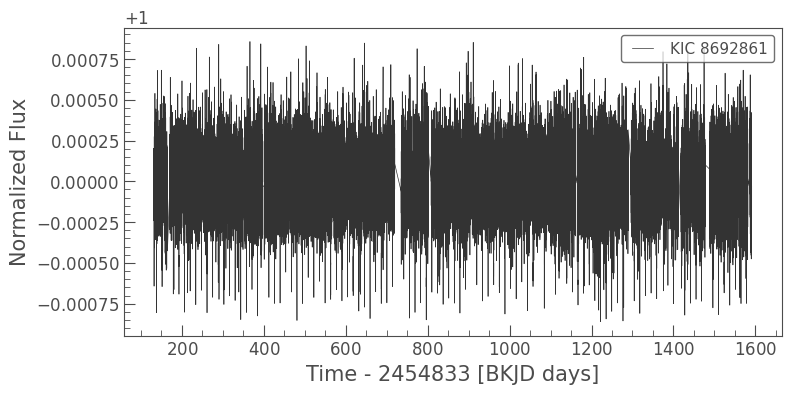

In [3]:
lc = lc_collection.stitch().flatten(window_length=901).remove_outliers()
lc.plot()

<AxesSubplot: xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

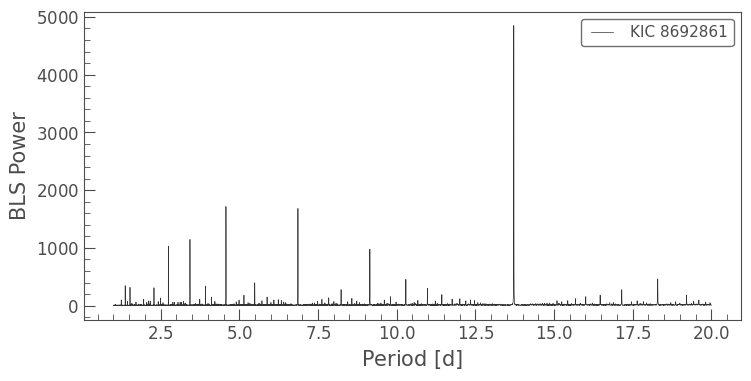

In [4]:
import numpy as np

period = np.linspace(1, 20, 10000)

bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500)
bls.plot()

In [5]:
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

planet_b_period

<Quantity 13.72177218 d>

(-5.0, 5.0)

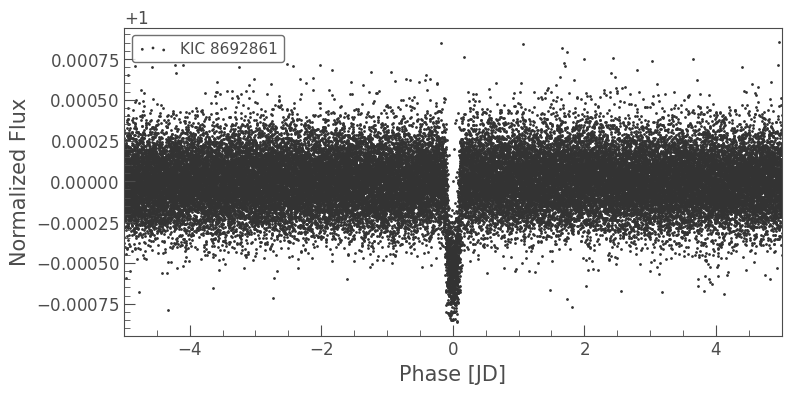

In [6]:
ax = lc.fold(period=planet_b_period, epoch_time=planet_b_t0).scatter()
ax.set_xlim(-5, 5)

<AxesSubplot: xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

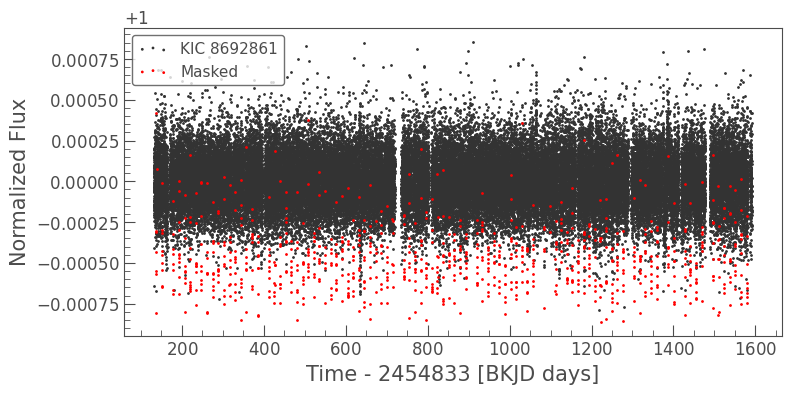

In [7]:
planet_b_mask = bls.get_transit_mask(period=planet_b_period, transit_time=planet_b_t0, duration=planet_b_dur)
masked_lc = lc[~planet_b_mask]
ax = masked_lc.scatter()
lc[planet_b_mask].scatter(ax=ax, c='r', label='Masked')

(-5.0, 5.0)

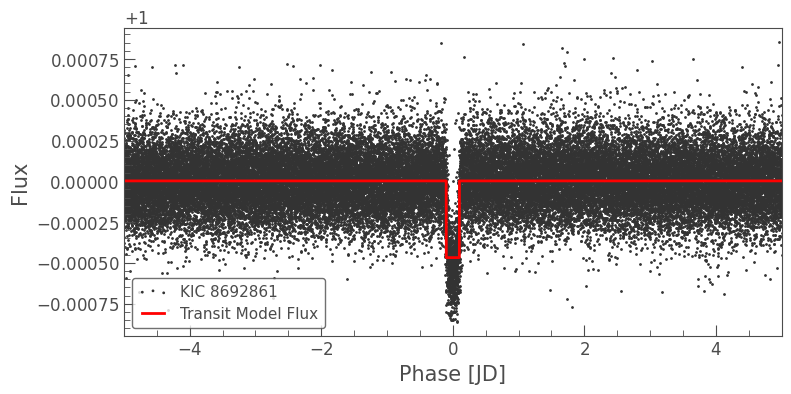

In [8]:
planet_b_model = bls.get_transit_model(period=planet_b_period, transit_time=planet_b_t0, duration=planet_b_dur)
ax = lc.fold(planet_b_period, planet_b_t0).scatter()
planet_b_model.fold(planet_b_period, planet_b_t0).plot(ax=ax, c='r', lw=2)
ax.set_xlim(-5, 5)

<Quantity 242.46664666 d>

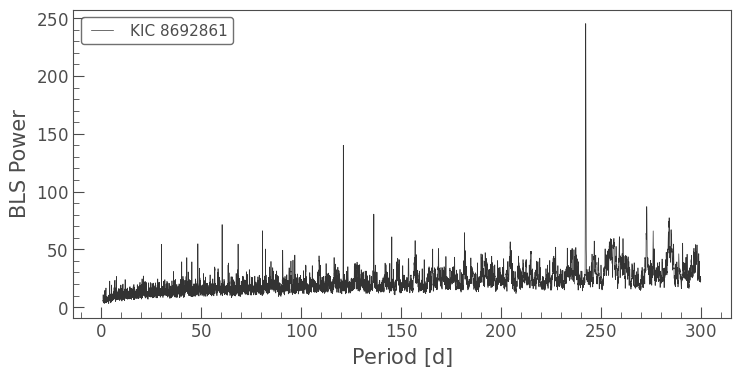

In [9]:
period = np.linspace(1, 300, 10000)
bls = masked_lc.to_periodogram('bls', period=period, frequency_factor=500)
bls.plot()

planet_c_period = bls.period_at_max_power
planet_c_t0 = bls.transit_time_at_max_power
planet_c_dur = bls.duration_at_max_power

planet_c_period

(-5.0, 5.0)

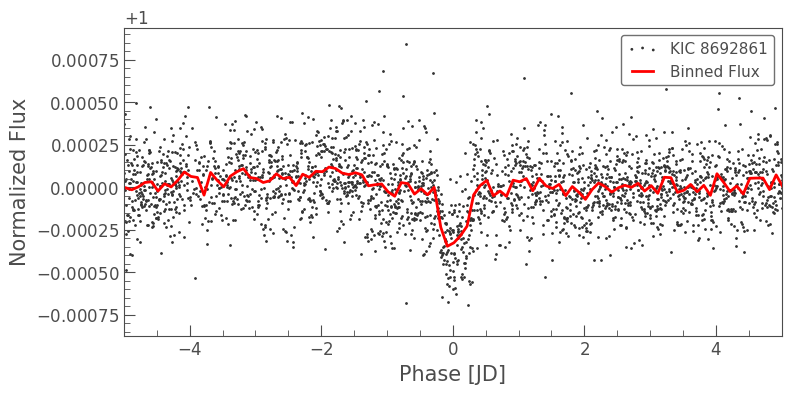

In [10]:
ax = masked_lc.fold(planet_c_period, planet_c_t0).scatter()
masked_lc.fold(planet_c_period, planet_c_t0).bin(0.1).plot(ax=ax, c='r', lw=2, label='Binned Flux').plot()

ax.set_xlim(-5, 5)

<AxesSubplot: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux'>

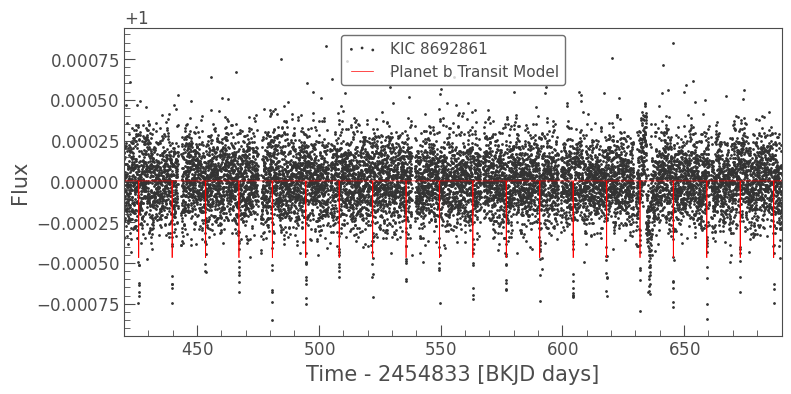

In [14]:
planet_c_model = bls.get_transit_model(period=planet_c_period,
                                       transit_time=planet_c_t0,
                                       duration=planet_c_dur)
ax = lc.scatter()
ax.set_xlim(420, 690)
planet_b_model.plot(ax=ax, c='r', label='Planet b Transit Model')
# planet_c_model.plot(ax=ax, c='r', label='Planet c Transit Model')

In [12]:
lc.interact_bls()